# Using Asteroid

This notebook was inspired by Andrew Shitov's excellent book [Using Raku: 100 Programming Challenges Solved with the Brand-New Raku Programming Language](https://andrewshitov.com/wp-content/uploads/2020/01/Using-Raku.pdf).  Here of course we use Asteroid to solve these programming challenges.

In [1]:
# make the Asteroid interpreter available in this notebook
import sys
sys.path[0] = '/home/ec2-user/SageMaker/asteroid/code'
from asteroid_interp import interp

**Note**: We use program as strings in this notebook so that we can run them right here in this notebook.

**Note**: There is a bug in the parser that does not allow for successive applications of member functions.  Those expressions need to be explicitly parenthesized.

# Part I
# Chapter 1: Strings
## 1.1 Using Strings


### 1. Hello, World!

> Print ‘Hello, World!’

The canonical `Hello, World!` program.  The easiest way to write this in Asteroid is,

In [2]:
program = \
'''
load "io".
println "Hello, World!".
'''
interp(program,prologue=True)

Hello, World!


Two other print functions exists: 
- `print` - print without appending a new line character.
- `raw_print` - print internal term structure. 

In [3]:
program = \
'''
load "io".
raw_print "Hello, World!".
'''
interp(program)

('string', 'Hello, World!')


Here we can see that an Asteroid string is tuple consisting of a type field and a value field.

### 2. Greet a person

> Ask a user for their name and greet them by printing ‘Hello, <Name\>!’

Here is our first solution using a separate function for each of the steps,   

In [4]:
program = \
'''
load "io".
print ("Enter your name: ").
let name = input().
print ("Hello, "+name+"!").
'''
# Note: uncomment in order to run the program
#interp(program)

Letting the function `input` do the prompting,

In [5]:
program = \
'''
load "io".
let name = input("Enter your name: ").
print ("Hello, "+name+"!").
'''
# Note: uncomment in order to run the program
#interp(program)

Doing everything in one step,

In [6]:
program = \
'''
load "io".
print ("Hello, "+input("Enter your name: ")+"!").
'''
# Note: uncomment in order to run the program
#interp(program)

### 3. String length

> Print the length of a string.

In order to print the length of a string we can use the function `len` available in the `util` module,

In [7]:
program = \
'''
load "io".
load "util".
println (len("Hello!")).
'''
interp(program)

6


We can also use the string member function `length` in order to compute the length of the string,

In [8]:
program = \
'''
load "io".
println ("Hello!" @length()).
'''
interp(program)

6


### 4. Unique digits

> Print unique digits from a given integer number.

In order to accomplish this we take advantage of the string `explode` function and the `sort` function on lists.
Finally we use the `reduce` function to map a list with repeated digits to a list with unique digits,

In [9]:
program = \
'''
load "io".

function unique with (x,y) do
    if not (x @member(y)) do
        return x @append(y).
    else do
        return x.
    end
end
        
let digits = "332211" @explode() 
                      @sort() 
                      @reduce(unique,[]).
println digits.
assert(digits == ["1","2","3"]).
'''
interp(program)

[1,2,3]


Probably the most noteworthy characteric about this program is the `reduce` function.  The `reduce` function applies a binary function to a list.  The first argument of the binary function acts like an accumulator and the second argument get instantiated with the elements of the list to be processed.  In our function `unique` the variable `x` is the accumulator with an initial value of `[]`.  The function tests whether the element `y` is on the list.  If it is not then it adds it to the list otherwise it just returns the accumulator unchanged.

## 1.2 Modifying string data

### 5. Reverse a string

> Print a string in the reversed order from right to left.

We use the `explode` function to turn a string into a list of characters, then we reverse the list and turn it back into a string using the `join` function,

In [10]:
program = \
'''
load "io".
let str = "Hello, World!" @explode() 
                          @reverse() 
                          @join("").
println str.
assert(str == "!dlroW ,olleH").
'''
interp(program)

!dlroW ,olleH


### 6. Removing blanks from a string

> Remove leading, trailing and double spaces from a given string.

In [11]:
program = \
'''
load "io".
let str = "   Hello  ,   World    !   " @trim() 
                                        @replace("  ","").
println str.
assert(str == "Hello, World!").
'''
interp(program)

Hello, World!


### 7. Camel case

> Create a camel-case identifier from a given phrase.

In this task, we will form the `CamelCase` variable names from a given phrase.
Names created in this style are built of several words; each of which starts
with a capital letter.

In [12]:
program = \
'''
load "io".

function title with w do
    let letter_list = w @tolower() 
                        @explode().
    let first_letter = letter_list @0 
                                   @toupper().
    if letter_list @length() > 1 do
        let title_case = ([first_letter] + letter_list @[1 to letter_list@length()-1]) @join("").
    else
        let title_case = first_letter.
    end
    return title_case.
end

let str = "once upon a time".
let camel_str = str @split() 
                    @map(title) 
                    @join("").
println camel_str.
assert(camel_str == "OnceUponATime").
'''
interp(program)

OnceUponATime


### 8. Incrementing filenames

> Generate a list of filenames like file1.txt, file2.txt, etc.

In [13]:
program = \
'''
load "io".

let root = "file".
let ext = ".txt".

for i in 1 to 5 do
    println (root+i+ext).
end
'''
interp(program)

file1.txt
file2.txt
file3.txt
file4.txt
file5.txt


### 9. Random passwords

> Generate a random string that can be used as a password.

In our solution we take advantage of Asteroid's `Pick` object.  The `Pick` object maintains a list of items that we can randomly select from using the `pick` member function.  As input to the `Pick` object we compute a bunch of lists of characters that are useful for password construction.  The function `achar` converts a decimal ASCII code to a single character string.

In [14]:
program = \
'''
load "io".
load "util".
load "pick".

seed(42).

-- make up lists of symbols useful for password construction
let int_list = [0 to 9] @map(tostring).
let lc_list = [97 to 122] @map(achar). -- lower case characters
let uc_list = [65 to 90] @map(achar). --upper case characters
let sp_list = ["!","_","#","$","%","*"].
-- build the overall pick list of symbols
let pick_list = int_list+lc_list+uc_list+sp_list.

-- generate the password and print it.
let pwd = Pick pick_list @pick(15)
                         @join("").
println pwd.

assert (pwd == "e3zvshdbS43brt#")
'''
interp(program)

e3zvshdbS43brt#


### 10. DNA-to-RNA transcription

> Convert the given DNA sequence to a compliment RNA.

We’ll not dig deep into the biology aspect of the problem. For us, it is important that the DNA is a string containing the four letters A, C, G, and T,
and the RNA is a string of A, C, G, and U. The transformation from DNA
to RNA happens according to the following table:
```
DNA: A C G T
RNA: U G C A
```
We will solve this programming problem using Asteroid's first-class patterns. We could have solved this with just testing equality on DNA characters but using first-class patterns in more general and can be applied to problems with a more structured mapping relationship.

In [15]:
program = \
'''
load "io".

let dna2rna_table = 
    [
    ("A","U"),
    ("C","G"),
    ("G","C"),
    ("T","A")
    ].

function dna2rna with x do
    for (dna,rna) in dna2rna_table do
        if x is *dna do
            return rna.
        end
    end
    throw Error("unknown dna char "+x).
end

let dna_seq = "ACCATCAGTC".
let rna_seq = dna_seq @explode() 
                      @map(dna2rna) 
                      @join("").
println rna_seq.

assert(rna_seq == "UGGUAGUCAG").
'''
interp(program)

UGGUAGUCAG


### 11. Caesar cipher

> Encode a message using the Caesar cipher technique.

The Caesar code is a simple method of transcoding the letters of the message
so that each letter is replaced with the letter that occurs in the alphabet N
positions earlier or later.
For example, if N is 4, then the letter e becomes a, f is transformed to b,
etc. The alphabet is looped so that z becomes v, and letters a to d become
w to z.

In [16]:
program = \
'''
load "io".
load "util".

let encode_table = [119 to 122] @map(achar) + [97 to 118] @map(achar).

function encode with (v:%string) %if len(v) == 1 do
    -- only lowercase letters are encoded
    if not (ascii(v) in [97 to 122]) do
        return v.
    else 
        return encode_table @(ascii(v)-ascii("a")).
    end
end

function decode with (v:%string) %if len(v) == 1 do
    -- only lowercase letters are decoded
    if not (ascii(v) in [97 to 122]) do
        return v.
    else 
        return encode_table @(ascii(v)-ascii("w")+4).
    end
end

let message = "hello, world!"
let secret = message @explode() 
                     @map(encode) 
                     @join("").
println secret.

assert (secret == "dahhk, sknhz!")

let decoded_msg = secret @explode()
                         @map(decode)
                         @join("").
println decoded_msg.

assert (decoded_msg == "hello, world!")
'''
interp(program)

dahhk, sknhz!
hello, world!


## 1.3 Text Analysis

### 12. Plural Endings

> Put a noun in the correct form — singular or plural — depending on the number next to it.

In program outputs, it is often required to print some number followed by a noun, for example:
```
10 files found
```
If there is only one file, then the phrase should be `1 file found` instead.

In [17]:
program = \
'''
load "io".

for n in 0 to 5 do
    println (n+" file"+("s " if n>1 or n==0 else " ")+"found").
end
'''
interp(program)

0 files found
1 file found
2 files found
3 files found
4 files found
5 files found


### 13. The most frequent word

> Find the most frequent word in the given text.

In our solution we use a hash table to count the number of word occurances.

In [18]:
program = \
'''
load "io".
load "util".
load "hash".

-- text generated at 'https://www.lipsum.com/'
let text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed accumsan magna quis risus commodo, et pellentesque dui cursus. Sed quis risus libero. Cras et mattis libero, eget varius nisi. Phasellus ultrices, augue non dictum eleifend, nunc elit blandit velit, a viverra risus enim in tellus. Maecenas quis ante eget turpis rhoncus rhoncus eget ut mauris. Suspendisse nec erat sed nunc tempus hendrerit. Nunc dictum nunc molestie eleifend tempus. Praesent cursus lorem diam, sed mattis velit vehicula scelerisque. Nunc iaculis rhoncus ante. Etiam quam nisi, fermentum et euismod a, vulputate eu elit. Suspendisse tincidunt ligula quis interdum blandit. Quisque sed aliquam tellus. Pellentesque ac lacus pulvinar, ornare purus ac, viverra ex. Donec quis pharetra dolor.

In ac massa tortor. Cras sagittis luctus scelerisque. Morbi a neque sed tortor ultrices dapibus. Mauris pretium vitae massa non auctor. Cras egestas ex ante, ac ullamcorper ante dignissim eget. Fusce bibendum justo ut enim luctus, id volutpat diam lacinia. Mauris sit amet ante risus.

Nullam rhoncus ultricies dui. Etiam vel metus vehicula, pellentesque felis ut, suscipit nunc. Sed nec interdum lorem. Maecenas odio erat, vestibulum nec dapibus id, commodo vitae libero. Nulla sed urna sit amet nunc commodo finibus sed vel elit. Aliquam euismod feugiat nisi quis placerat. Aliquam libero nisl, ultrices non est at, sagittis hendrerit dui. Quisque id sem lorem. Nam ultricies metus id ultrices molestie. Pellentesque elementum consequat nibh, nec convallis lorem ullamcorper in. Etiam vitae mi tellus. Etiam accumsan massa sit amet dolor tincidunt iaculis. Nam ullamcorper blandit sem id bibendum. Quisque elementum ipsum ac sapien blandit vehicula."

-- get rid of punctuation, turn to lower case, and split into words.
-- Note: we could have employed richer regular expressions to clean up the text here
let wl = text @replace("\.","")
              @replace(",","")
              @tolower()
              @split().

-- put the words into a hash table, the value is the count of the words
let ht = HashTable().
for w in wl do
    if not ht @get(w) do
        ht @insert(w,1).
    else do
        ht @insert(w,ht @get(w)+1).
    end
end

-- get the contents of hash table and find the most frequent word
let (keys,values) = unzip(ht@aslist()).
let values_sorted = values @copy()
                           @sort(true).
let most_frequent_word = keys @(values @index(values_sorted @0)).
println most_frequent_word.

assert (most_frequent_word == "sed").
'''
interp(program)

sed


### 14. The longest common substring

> Find the longest common substring in the given two strings.

Let us limit ourselves with finding only the first longest substring. If there
are more common substrings of the same length, then the rest are ignored.
There are two loops (see also Task 17, The longest palindrome) over the first
string (`stra`), and they use the index method to search for the substring in the
second string (`strb`).

In [19]:
program = \
'''
load "io".

let stra = "the quick brown fox jumps over the lazy dog".
let strb = "what does the fox say?".
let common = "".

for startix in 0 to stra @length()-1 do
    for endix in startix to stra @length()-1 do
        let s = stra @[startix to endix].
        if strb @index(s) and s @length() > common @length() do
            let common = s.
        end
    end
end

if common do
    println ("The longest common substring is '"+common+"'.").
else do
    println ("There are no common substrings.").
end

assert (common == " fox ").
'''
interp(program)

The longest common substring is ' fox '.


### 15. Anagram test

> Tell if the two words are anagrams of each other.

An anagram is a word, phrase, or name formed by rearranging the letters of another, such as `cinema`, formed from `iceman`.

In [20]:
program = \
'''
load "io".

let str1 = "cinema".
let str2 = "iceman".

function normalize with str do
    return str @explode()
               @sort() 
               @join("").
end

if normalize(str1) == normalize(str2) do
    println "Anagrams".
else do
    println "Not anagrams".
end

assert (normalize(str1) == normalize(str2)).
'''
interp(program)

Anagrams


### 16. Palindrome test

> Check if the entered string is palindromic.

A palindrome is a string that can be read from both ends: left to right or right
to left.

In [21]:
program = \
'''
load "io".

let str = "Was it a rat I saw?".

function clean with str:%string do
    return str @tolower()
               @replace("[^a-z]","").
end

-- only keep lower case letters
let clean_str = clean(str).

-- check if it is palidromic
if clean_str == clean_str @flip() do
    println "Palindromic".
else do
    println "Not palindromic".
end

assert (clean_str == clean_str @flip()).
'''
interp(program)

Palindromic


### 17. The longest palindrome

> Find the longest palindromic substring in the given string.

The main idea behind the solution is to scan the string with a window of
varying width. In other words, starting from a given character, test all the
substrings of any length possible at that position. 
Now, extract the substring and do the check similar to the solution of Task
16, Palindrome test. Here, we have to be careful to check the palindrome
without taking into account the non-letter characters but saving the result as
part of the original string. 

In [22]:
program = \
'''
load "io".

let str = "Hello, World!".

function clean with str:%string do
    return str @tolower()
               @replace("[^a-z]","").
end

function palindrome_test with str:%string do
    let clean_str = clean(str).
    if clean_str == clean_str @flip() do
        return true.
    else do
        return false.
    end
end

-- create the moving window over the string
let longest_palindrome = "".

for i in 0 to str @length()-2 do
    for j in i+1 to str @length()-1 do
        let str1 = str @[i to j].
        if palindrome_test(str1) and 
           str1 @length() > longest_palindrome @length() do 
            let longest_palindrome = str1.
        end
    end
end

println longest_palindrome.

'''
interp(program)

o, Wo


### 18. Finding duplicate texts

> Find duplicate fragments in the same text.

We do this by finding and hashing N-grams after the appropriate preprocessing.  We will use `N=3`.

In [23]:
program = \
'''
load "io".
load "hash".

-- text from "www.lipsum.com"

let str = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed malesuada sapien nec neque suscipit, non rutrum arcu scelerisque. Nam feugiat sapien porta ipsum accumsan, eget maximus diam volutpat. Pellentesque elementum in orci quis pretium. Donec dignissim nunc lectus, id ornare urna varius ut. Praesent semper faucibus vehicula. Aliquam luctus sapien at lorem malesuada, eget suscipit felis facilisis. Suspendisse velit lectus, mollis sit amet tempor eget, faucibus ut nulla. Vestibulum et elementum dolor, a vehicula ipsum. Morbi ut fringilla nisi. Fusce congue rutrum orci nec porta. Ut laoreet justo vel turpis sodales vehicula. Nulla porttitor nisl id odio eleifend sodales.

Suspendisse blandit tristique enim id laoreet. Etiam vel aliquet dui, quis tempus magna. Donec blandit volutpat felis egestas tincidunt. Integer placerat luctus mi non pharetra. Donec aliquet nisl orci, egestas elementum nunc bibendum a. Morbi nec risus aliquet, viverra nunc in, molestie odio. Curabitur pellentesque, ante eget dictum aliquam, felis leo bibendum libero, vel bibendum lorem velit eget ex. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Vestibulum pretium tellus quis ante vulputate, pretium tincidunt ipsum dapibus. Praesent congue, ipsum ut sagittis tempus, lacus nisi dapibus dui, aliquam porta metus odio ut neque. Aliquam vitae faucibus dolor. Nulla iaculis lorem non mauris viverra, ut malesuada nibh aliquam. Nam bibendum sit amet massa in dignissim. Nam posuere nunc ante, at viverra diam rhoncus vel.

Aliquam mollis sagittis nulla. Maecenas faucibus eu dui eget accumsan. Suspendisse sit amet fermentum sapien. Nunc vitae mi nibh. Mauris condimentum vestibulum imperdiet. Quisque at vehicula dui. Integer sit amet volutpat arcu. Maecenas efficitur leo tortor, non ullamcorper magna tempor non. Sed efficitur quis metus ut pulvinar. Proin nunc felis, congue sit amet nibh placerat, tincidunt mattis nunc. Duis efficitur lacus a orci porttitor, sed molestie risus tempor.

Sed tincidunt ipsum at urna sollicitudin feugiat. Ut mollis orci quis massa dictum facilisis. Maecenas non elementum mauris. Sed rutrum orci faucibus, tristique nunc nec, mattis ante. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. In hac habitasse platea dictumst. Morbi pellentesque dolor sit amet nunc tincidunt, ut rutrum ante vulputate. Nullam pretium, mi sed condimentum luctus, ipsum nunc dictum lorem, vel ultricies nibh mi ut sem. Nam volutpat id libero eget mollis.

Vestibulum eget velit eros. Phasellus sit amet vestibulum odio, vel malesuada quam. Mauris dictum erat eu ligula mollis laoreet. Phasellus ut ante auctor, hendrerit ipsum et, fermentum magna. Etiam nec eros elementum, consectetur nibh ac, ullamcorper ligula. Aliquam sed porttitor sapien. Nulla tincidunt, turpis vitae venenatis aliquet, quam purus elementum diam, in tincidunt orci diam sed nulla. Cras pellentesque non diam quis sollicitudin. Duis suscipit lectus dui, eu varius metus pretium sit amet.

Nulla eu ex velit. Ut non justo semper, gravida erat quis, vehicula est. Suspendisse nunc dui, iaculis id purus sit amet, rutrum commodo lacus. Aenean consequat turpis a est vestibulum, ac accumsan nibh dapibus. Nam blandit scelerisque lectus, eu pellentesque arcu ornare non. Fusce ac gravida diam. Ut in fringilla eros. Sed metus augue, porta quis vehicula at, pellentesque et mauris. Duis sodales lacus sit amet condimentum placerat. In blandit tristique nulla eget malesuada. Sed congue finibus neque at semper. Etiam pellentesque egestas urna, ut lobortis odio euismod et. Phasellus aliquet quam purus, quis ullamcorper sem mollis eu.

Mauris quis ullamcorper nisi. Aenean quam nulla, sodales eu faucibus in, mattis a nulla. Nullam pulvinar pretium justo eu mattis. Aliquam rutrum ipsum vitae leo maximus ultrices. Donec ut pulvinar nisi. Sed pharetra, turpis dictum lobortis egestas, quam massa venenatis enim, dapibus efficitur dolor mauris eu felis. Donec vulputate ultrices justo sit amet condimentum. Donec id posuere nulla. In vestibulum mi in lectus commodo dignissim. Quisque vestibulum egestas arcu sit amet finibus. Proin commodo aliquet neque quis maximus.

Nulla facilisi. Sed gravida aliquet diam in congue. Mauris vehicula justo ac sollicitudin laoreet. Mauris enim mi, auctor id magna eget, feugiat sollicitudin leo. Vivamus ornare ornare commodo. Suspendisse ut dui quis enim porta pretium. Praesent vitae lacus fermentum, posuere orci ac, imperdiet massa. Nulla hendrerit id nisl sed maximus. Vivamus commodo lacus eu condimentum bibendum. Suspendisse porttitor sem eget dolor aliquet congue. Pellentesque tristique augue at quam hendrerit dignissim. Aenean a congue dui. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae; Integer ante lacus, commodo et enim sed, auctor egestas metus.

Aliquam a urna id risus tincidunt rutrum. Nunc facilisis, tortor ac suscipit aliquam, ante neque tincidunt mi, nec ullamcorper lectus ligula vel urna. Suspendisse lobortis at felis sit amet facilisis. Pellentesque velit lacus, porttitor vitae eros rutrum, convallis blandit erat. Pellentesque nec mi viverra, volutpat dui in, rutrum lacus. Ut non venenatis leo. Praesent sollicitudin magna porttitor lorem elementum molestie non a turpis. Suspendisse potenti.

Donec malesuada iaculis laoreet. Nunc ut volutpat ante, ut consequat tortor. Phasellus posuere, ipsum quis dignissim iaculis, nisl felis ullamcorper ligula, quis placerat sem sapien nec ante. Cras suscipit ut magna nec lacinia. Donec ipsum nibh, imperdiet non aliquam eu, maximus id ante. Pellentesque vitae felis felis. Aliquam et diam sed nulla volutpat vestibulum molestie non lacus. Praesent porta et lacus auctor fermentum. In hac habitasse platea dictumst. Aliquam erat volutpat. Etiam at ligula orci. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos."


let word_list = str @tolower()
                    @replace("[^a-z0-9_]"," ")
                    @split().
let ht = HashTable().

-- create N-grams
for i in 0 to word_list @length()-3 do
    -- Note: make this code more general
    let n_gram = [word_list@i, word_list@(i+1), word_list @(i+2)] @join(" ").
    -- put the N-gram into a hash table, the value is the count of the N-gram in the text.
    if not ht @get(n_gram) do
        ht @insert(n_gram,1).
    else do
        ht @insert(n_gram,ht @get(n_gram)+1).
    end
end

for ((n_gram,cnt) %if cnt > 1) in ht @aslist() do
    println (n_gram+": "+cnt).
end
'''
interp(program)

lorem ipsum dolor: 2
ipsum dolor sit: 2
dolor sit amet: 3
sit amet consectetur: 2
amet consectetur adipiscing: 2
consectetur adipiscing elit: 2
in hac habitasse: 2
hac habitasse platea: 2
habitasse platea dictumst: 2
aliquet quam purus: 2
diam sed nulla: 2
sit amet condimentum: 2


# Chapter 2: Numbers
## 1.1 Using numbers



### 19. $\pi$

> Print the value of $\pi$.


In [24]:
program = \
'''
load "io".
load "math". -- definition of pi

println pi.
'''
interp(program)

3.141592653589793


Other constants are also available.

In [25]:
program = \
'''
load "io".
load "math". 

println e.
println tau. -- tau=2*pi
'''
interp(program)

2.718281828459045
6.283185307179586


### 20. Factorial!

> Print the factorial of a given number.

By definition, the factorial of a positive integer number N is a product of all the integers numbering from 1 to N, including N. Our first solution is based on the direct implementation of the definition above using the list `reduce` function. 

In [26]:
program = \
'''
load "io".

let n = 3.
let fact = [1 to n] @reduce(lambda with (a,b) do return a*b).
println fact.
assert (fact == 6).
'''
interp(program)

6


Our second solutions uses the recursive definition of factorial,

$
    x!=
\begin{cases}
    1 &\text{if } x = 0,\\
    x(x-1)! &\text{if } x > 0,\\
    \perp &\text{if } x < 0,
\end{cases}
$

where $x \in \text{Int}$.
Here, each case specifies what value the function should return if
the predicate applied to the input is true.  The last case is of some interest because it states that the function is undefined for negative integers.

In [27]:
program = \
'''
load "io".

let POS_INT = pattern with (x:%integer) %if x > 0.
let NEG_INT = pattern with (x:%integer) %if x < 0.

function fact
    with 0 do 
        return 1
    orwith n:*POS_INT do
        return n * fact (n-1).
    orwith n:*NEG_INT do
        throw Error("factorial is not defined for "+n).
    end

println ("The factorial of 3 is: " + fact (3)).
assert (fact(3) == 6).
'''
interp(program)

The factorial of 3 is: 6


### 21. Fibonacci numbers

> Print the $N^{th}$ Fibonacci number.

Fibonacci numbers are defined by the recurring formula:

$
f_n = f_{n-1} + f_{n-2}
$

You can assign two values at a time (see Task 48, Swap two values). You can use that technique for calculating the next Fibonacci number from the pre- vious two. To bootstrap the algorithm, the two first values are needed. In one of the definitions of the Fibonacci row, the first two values are both 1.

Here we give an iterative solutions.  It is clear that there exists a trival recursive solution by implementing the above formula.


In [28]:
program = \
'''
load "io".

let n = 10. -- compute the 10th Fib number

let (f_1,f_2) = (1,1).
for i in 3 to n do
    let (f_1,f_2) = (f_1+f_2,f_1).
end

println f_1.
assert (f_1 == 55)
'''
interp(program)

55


### 22. Print squares

> Print the squares of the numbers from 1 to 10.

Of course this is straight forward with a for-loop over a list.  Here we show another solution using the list `map` function.

In [29]:
program = \
'''
load "io".

let sq = [1 to 10] @map(lambda with x do return x*x).

println sq.

assert (sq == [1,4,9,16,25,36,49,64,81,100])
'''
interp(program)

[1,4,9,16,25,36,49,64,81,100]


### 23. Powers of two

> Print the first ten powers of two.

Just as in the previous challenge we skip the naive loop solution and give a solution using the `map` function.

In [30]:
program = \
'''
load "io".
load "math".

let p2 = [0 to 9] @map(lambda with x do return pow(2,x)).

println p2.

assert (p2 == [1,2,4,8,16,32,64,128,256,512])
'''
interp(program)

[1,2,4,8,16,32,64,128,256,512]


### 24. Odd and even numbers

> Print the first ten odd numbers. Print the first ten even numbers.

We start with printing the first ten odd numbers.

In [31]:
program = \
'''
load "io".
load "math".

let odd = []
for (n %if mod(n,2) =/= 0) in 1 to 10 do
    let odd = odd + [n].
end

println odd.
assert(odd == [1,3,5,7,9])
'''
interp(program)

[1,3,5,7,9]


Now the even numbers.

In [32]:
program = \
'''
load "io".
load "math".

let even = []
for (n %if mod(n,2) == 0) in 1 to 10 do
    let even = even + [n].
end

println even.
assert(even == [2,4,6,8,10])
'''
interp(program)

[2,4,6,8,10]


### 25. Compare numbers approximately

> Compare the two non-integer values approximately.

Comparing non-integer numbers, which are represented as floating-point numbers is often a task that requires approximate comparison.  In Asteroid this can be accomplished with the `isclose` function availabel in the `math` module.



In [33]:
program = \
'''
load "io".
load "math".

-- not equal under the default tolerance of 1E-09
assert (not isclose(2.0,2.00001)).

-- equal under the user defined tolerance of 0.0001
assert (isclose(2.0,2.00001,0.0001)).
'''
interp(program)

### 26. Multiplying big numbers

> Create a program to multiply very big integer numbers.

**Note**: Asteroid does not support big integer arithmetic.

### 27. Prime numbers

> Decide if the given number is a prime number.

Prime numbers are those that can be divided only by 1, and by themselves.

In [34]:
program = \
'''
load "io".
load "math".

function isprime with x do
    if x >= 2 do
        for y in range(2,x) do
            if not mod(x,y) do
                return false.
            end
        end
    else do
        return false.
    end
    return true.
end

println (isprime 17).
println (isprime 15).

assert (isprime(17)).
assert (not isprime(15)).
'''
interp(program)

true
false


### 28. List of prime numbers

> Print the list of the first ten prime numbers.



In [35]:
program = \
'''
load "io".
load "math".

function isprime with x do
    if x >= 2 do
        for y in range(2,x) do
            if not mod(x,y) do
                return false.
            end
        end
    else do
        return false.
    end
    return true.
end

let cnt = 0.
for (n %if isprime(n)) in 1 to 1000000 do
    println n.
    let cnt = cnt+1.
    if cnt == 10 do
        break.
    end
end
    
'''
interp(program)

2
3
5
7
11
13
17
19
23
29


### 29. Prime factors

> Find the prime factors of a given number.

Prime factors are the prime numbers that divide the given integer number exactly.


In [36]:
program = \
'''
load "io".
load "math".

function isprime with x do
    if x >= 2 do
        for y in range(2,x) do
            if not mod(x,y) do
                return false.
            end
        end
    else do
        return false.
    end
    return true.
end

function primes with x do
    let lp = [].
    for (n %if isprime(n)) in 1 to x do
        let lp = lp+[n].
    end
    return lp.
end

let n = 165.
let factors = [].
let primes_list =  primes(n).
let ix = 0.

while n > 1 do
    let factor = primes_list @ix.
    let ix = ix+1.
    if not mod(n,factor) do
        let ix = 0.
        let n = n/factor.
        let factors = factors+[factor].
    end
end
println factors.

assert (factors == [3,5,11])
'''
interp(program)

[3,5,11]


### 30. Reducing a fraction

> Compose a fraction from the two given integers — numerator and denominator — and reduce it to lowest terms.

5/15 and 16/280 are examples of fractions that can be reduced. The final results of this task are 1/3 and 2/35. Generally, the algorithm of reducing a fraction requires searching for the greatest common divisor, and then dividing both numerator and denominator by that number.  For our solution we use the function `gcd` available in the `math` module.

In [37]:
program = \
'''
load "io".
load "math".

-- fraction a/b
let a = 16.
let b = 280.

-- reduce fraction
let gcd_val = gcd(a,b).
let numerator = a/gcd_val.
let denominator = b/gcd_val.
println numerator.
println denominator.

-- show that original and reduced fraction are the same value
assert (a/b == numerator/denominator).
'''
interp(program)

2
35


### 31. Divide by zero

> Do something with the division by zero.

Asteroid is an eager language, that is, expressions are evaluated as early as possible.  We can trap division-by-zero errors using a try-catch block.

In [38]:
program = \
'''
load "io".

try
    println (42/0).
catch (type,m) do
    println m.
end
println "We are still alive...".
'''
interp(program)

integer division or modulo by zero
We are still alive...


## 2.1 Random numbers

### 32. Generating random numbers

> Generate a random number between 0 and N.

Asteroid has two random number generation functions: `random()` generates a random real value in the interval $[0.0,1.0)$ and `randint(a,b)` that generates a random value in the interval $[a,b]$.  The type of the random value generated depends on the type of the values a and b specifying the interval.

In [39]:
program =\
'''
load "io".
load "random".
load "util".

seed(42).

println (random()).          -- random value in [0.0,1.0)
println (randint(0.0,1.0)).  -- random value in [0.0,1.0]
println (randint(0,1)).      -- always 0 or 1

-- generating a random number in the appropriate interval
let n = 10.
println (randint(0.0,toreal(n))).
println (randint(0,n)).

'''
interp(program)

0.6394267984578837
0.025010755222666936
1
2.4489185380347624
2


### 33. Neumann’s random generator

> Implement the von Neumann’s random number generator (also known as Middle-square method).

This algorithm is a simple method of generating short sequences of four-digit random integers. The method has its drawbacks, but for us, it is an interesting algorithmic task. The recipe has these steps:

1. Take a number between 0 and 9999.
2. Calculate the square of it.
3. If necessary, add leading zeros to make the number 8-digit.
4. Take the middle four digits.
5. Repeat from step 2.

To illustrate it with an example, let’s take the number 1234 as the seed. On step 2, it becomes 1522756; after step 3, 01522756. Finally, step 4 extracts the number 5227. 

In [40]:
program =\
'''
load "io".
load "util".

let n = 1234.
let sq = n*n.
let sq_str = tostring(sq).
if sq_str @length() < 8 do
    let prefix = [1 to 8-sq_str@length()] @map(lambda with _ do return "0") 
                                          @join("").
    let sq_str = prefix + sq_str.
end
let rstr = sq_str @[2 to 5].
let rval = tointeger(rstr).
println rval.

assert (rval == 5227)
'''
interp(program)

5227


### 34. Histogram of random numbers

> Test the quality of the random generator by using a histogram to visualise the distribution.

The quality of the built-in generator of random numbers fully depends on the algorithm the developers of the compiler used. As a user, you cannot do much to change the existing generator, but you can always test if it delivers numbers uniformly distributed across the whole interval.  

In our solution we generate 10 random integers between 0 and 9 and count how many times each of the integers have been generated.  If it is a decent random number generators all numbers should have been generated roughly an equal number of times.

In [41]:
program =\
'''
load "io".
load "random".

let hist = [0 to 9] @map(lambda with _ do return 0).

for _ in range(10000) do
    let ix = randint(0,9).
    let hist @ix = hist @ix +1
end

println hist.

'''
interp(program)

[944,1032,1015,968,981,986,1014,1058,989,1013]


## 2.3 Mathematical problems



### 35. Distance between two points

> Calculate the distance between the two points on a surface.

There are two points on a surface, each with their own coordinates, x and y. The task is to find the distance between these two points.
A straightforward solution would be to use the Pythagorean theorem:

In [42]:
program =\
'''
load "io".
load "math".

let x = [10, 3].
let y = [9, 1].
let d = (sqrt(pow(x@0-y@0,2) + pow(x@1-y@1,2))).
println d.

assert (d == 2.23606797749979)
'''
interp(program)

2.23606797749979


Another approach is using the math identity,

$
||a|| = \sqrt{a\bullet a}
$

where in our case $a$ would be the distance vector between points $x$ and $y$,

In [43]:
program =\
'''
load "io".
load "math".
load "vector".

let x = [10, 3].
let y = [9, 1].
let a = vsub(x,y).
let d = sqrt(dot(a,a)).
println d.

assert (d == 2.23606797749979)
'''
interp(program)

2.23606797749979


The interesting  part about the second approach is that it is completely dimension independent.  Note that except for the definition of the vectors $x$ and $y$ dimension never play a part of the definition of the program.

### 36. Standard deviation

> For the given data, calculate the standard deviation value (sigma).

Standard deviation is a statistical term that shows how compact data distribution is. The formula is the following:

$
\sigma = \sqrt{\frac{\Sigma (x_i - \bar{x})^2}{N - 1}}
$

where $N$ is the number of elements in the array $x$; $\bar{x}$ is the average value (see Task 56, Average on an array).


In [44]:
program =\
'''
load "io".
load "math".

let values = [727.7, 1086.5, 1091.0, 1361.3, 1490.5, 1956.1].

let avg = values @reduce(lambda with (x,y) do return x+y) / values @length().
let diff_sq = values @map(lambda with x do return pow(x-avg,2)).
let numerator = diff_sq @reduce(lambda with (x,y) do return x+y).
let denominator = values @length() -1.
let sigma = sqrt(numerator/denominator).
println sigma.

assert (sigma == 420.96248961952256)
'''
interp(program)

420.96248961952256


### 37. Polar coordinates

> Convert the Cartesian coordinates to polar and backward.

Polar coordinates are a convenient way of representing points on a surface with the two values: distance from the centre of coordinates and the angle between the vector and the pole axis.
The conversion formulae between the Cartesian and polar systems, which is valid for **positive** x and y, are the following:

$
x = r \cos \psi\\
y = r \sin \psi\\
r = \sqrt{x^2 + y^2}\\
\psi = \arctan \frac{y}{x}
$

These expressions can be implemented as-is in the code:

In [45]:
program =\
'''
load "io".
load "math".

function polar_to_cartesian with (r,psi) do
    -- return a tuple: (x,y)
    return (r*cos(psi),r*sin(psi)).
end

function cartesian_to_polar with (x,y) do
    -- return a tuple: (r,psi)
    return (sqrt(pow(x,2)+pow(y,2)),atan(y/x)).
end

let (r,psi) = cartesian_to_polar(1,2).
let (x,y) = polar_to_cartesian(r,psi).

println (x,y).

-- show that the recovered coordinates are the same
-- we started with
assert (isclose(1,x,0.0001) and isclose(2,y,0.0001)).
'''
interp(program)

(1.0000000000000002,2.0)


For the **negative** $x$ and $y$, the Cartesian-to-polar conversion is a bit more complicated. Depending on the quadrant of the point, the $\psi$ value is bigger
or smaller by $\pi$. When $x$ is zero, it is either $-\frac{\pi}{2}$ or $\frac{\pi}{2}$.
All these variants can be implemented by using with/orwith clauses and conditional matching, as demonstrated below:

In [46]:
program =\
'''
load "io".
load "math".
load "util".

function polar_to_cartesian with (r,psi) do
    -- return a tuple: (x,y)
    return (r*cos(psi),r*sin(psi)).
end

function cartesian_to_polar with (x,y) do
    return (sqrt(pow(x,2)+pow(y,2)),cartesian_to_psi(x,y)).
end

function cartesian_to_psi 
    with (x,y) %if x > 0  do
        return atan(toreal(y)/x).
    orwith (x,y) %if x < 0 and y >= 0 do
        return atan(toreal(y)/x)+pi.
    orwith (x,y) %if x < 0 and y < 0 do
        return atan(toreal(y)/x)-pi.
    orwith (x,y) %if x == 0 and y > 0 do
        return pi/2.
    orwith (x,y) %if x == 0 and y < 0 do
        return -pi/2.
    orwith (x,y) %if x == 0 and y == 0 do
        return none.
    end
    
let (r,psi) = cartesian_to_polar(-3,5).
let (x,y) = polar_to_cartesian(r,psi).

println (x,y).

-- show that the recovered coordinates are the same
-- we started with
assert (isclose(-3,x,0.0001) and isclose(5,y,0.0001)).
'''
interp(program)

(-2.999999999999999,5.000000000000001)


### 38. Monte Carlo method

> Calculate the area of a circle of radius 1 using the Monte Carlo method.

The Monte Carlo method is a statistical method of calculating data whose formula is not known. The idea is to generate a big number of random num- bers and see how many of them satisfy the condition.

To calculate the area of a circle of the radius 1, pairs of random numbers between −1 and 1 are generated. These pairs represent the points in the square in the center of coordinates with sides of length 2. The area of the square is thus 4. If the distance between the random point and the center of the square is less than 1, then this point is located inside the circle of that radius. Counting the number of points that landed inside the circle and the number of points outside the circle gives the approximate value of the area of the circle, as soon as the area of the square is known. Here is the program.

In [47]:
program =\
'''
load "io".
load "math".
load "random".

seed(42).

let inside = 0. 
let n = 10000.
for _ in 1 to n do 
    let point = (randint(-1.0,1.0),randint(-1.0,1.0)).
    if sqrt(pow(point@0,2)+pow(point@1,2)) <= 1.0 do
        let inside = inside+1.
    end
end
let area = 4.0 * inside / n.
println area.

assert (area == 3.1392).
'''
interp(program)

3.1392


### 39. Unicode digits

> Print all Unicode digits.

**Note**: Asteroid currently does not support Unicode.

### 40. Guess the number

> Write a program that generates a random integer number 0 through 10 and asks the user to guess it, saying if the entered value is too small or too big.

First, a random number needs to be generated and then 
ask for the initial guess and enter the loop, which compares the guess with the generated number.

In [48]:
program =\
'''
load "io".
load "random".
load "util".

let n = randint(0,10).
let guess = tointeger(input("Guess my number between 0 and 10: ")).
while guess =/= n do
    if guess < n do
        println "Too small.".
    elif guess > n  do
         println "Too big.".
    end
    let guess = tointeger(input("Try again: ")).
end
println "Yes, this is it!".
'''
# Note: uncomment in order to run the program
#interp(program)

### 41. Binary to integer

> Convert a binary number to a decimal integer.

In Asteroid this is straight forward using the built-in `tointeger` function passing it a string representation of the binary number and the base.

In [49]:
program =\
'''
load "io".
load "util".

let bin = "101101".
let int = tointeger(bin,2).
println int.

assert (int == 45).
'''
interp(program)

45


### 42. Integer as binary, octal, and hex

> Print a given integer number in the binary, octal, and hexadecimal representations.

In Asteroid this is easily done with the `tobase` function.

In [50]:
program =\
'''
load "io".
load "util".

let val = 42.

println (tobase(val,2)).  -- bin
println (tobase(val,8)).  -- oct
println (tobase(val,16)). -- hex

-- make sure that conversions are correct in both directions
assert (tointeger(tobase(val,2),2) == val). 
assert (tointeger(tobase(val,8),8) == val).  
assert (tointeger(tobase(val,16),16) == val). 
'''
interp(program)

101010
52
2A


### 43. Sum of digits

> Calculate the sum of digits of a given number.

Pretty straight forward using string and list manipulation.

In [51]:
program =\
'''
load "io".
load "util".

let number = 139487854.


let s = tostring number @explode()
                        @map(tointeger)
                        @reduce(lambda with (x,y) do return x+y).
println s.

assert (s == 49).
'''
interp(program)

49


### 44. Bit counter

> Count the number of bits set to 1 in a binary representation of a positive integer number.

If we remove all the zeros from a binary number then we left with only 1 characters which we can then count.

In [52]:
program =\
'''
load "io".

let bits = "1010101" @replace("0","")
                     @length().
println bits.

assert (bits == 4).
'''
interp(program)

4


### Compose the largest number

> Given the list of integers, compose the largest possible number by concatenating them.

The easiest way to achieve that is to treat numbers as strings, sort them alphabetically in descending order, concatenate the pieces to a single string, and get the resulting integer.

In [53]:
program =\
'''
load "io".
load "util".

let a = tointeger([67, 8, 1, 5, 45] @map(tostring) @sort(true) @join("")).
println a.

assert (a == 8675451).

'''
interp(program)

8675451


### 46. Convert to Roman numerals

> Convert an integer number to a Roman numerals string.

Roman numbers are not a direct translation of the decimal system. In this task, we assume that the number is not more than 3999, which is the maximum a regular Roman number can reach.

Let’s use the algorithm that keeps the table of pre-calculated sequences of Roman letters so that we don’t have to check when III becomes IV, or when another I appears after V, etc.

In the program below, there are four such sequences: for thousands, hundreds, tens, and ones. The program iterates over the digits of the number in the decimal representation and chooses one of the values from the array of lists stored in the `roman_hash` table.


In [54]:
program =\
'''
load "io".
load "math".
load "util".
load "hash".

let roman_hash = HashTable().
roman_hash @insert(1000,["","M","MM","MMM"]).
roman_hash @insert(100,["","C","CC","CCC","CD","D","DC","DCC","DCCC","CM"]).
roman_hash @insert(10,["","X","XX","XXX","XL","L","LX","LXX","LXXX","XC"]).
roman_hash @insert(1,["","I","II","III","IV","V","VI","VII","VIII","IX"]).

let n = 2018.
let p10 = range(tostring n @length()) @map(lambda with x do return pow(10,x))
                                      @reverse().
let digits = tostring n @explode()
                        @map(tointeger).
let z = zip(digits, p10).
println z.
let roman = "".
for (d,p) in z do
    let roman = roman + roman_hash @get(p) @d.
end
println roman.

assert (roman == "MMXVIII")
'''
interp(program)

[(2,1000),(0,100),(1,10),(8,1)]
MMXVIII


### 47. Spelling numbers

> Write an integer number below one million in words.

Human languages have many inconsistencies, especially in the most frequent constructs. Spelling numbers seems to be a simple task, but due to a number of small differences, the resulting program is quite big.

The program is listed on the next page. Let’s discuss the algorithm first.

Take a number; for example, 987,654. The rules for spelling out the groups of three digits, 987 and 654, are the same. For the first group, the word thousand must be added.

Now, examine a group of three digits. The first digit is the number of hun- dreds, and it has to be spelled only if it is not zero. If it is not zero, then we spell the digit and add the word hundred.

Now, remove the leftmost digit, and we’ve got two digits left. If the remain- ing two digits form the number from 1 to 20, then it can be directly con- verted to the corresponding name. The names for the numbers from 0 to 10 are obviously different. The names for the numbers from 11 to 19 have some commonalities, but is it still easier to directly prepare the names for all of them.

For the larger numbers (21 to 99), there are two cases. If the number is dividable by 10 then a name for 20, 30, 40, etc. is taken. If not, then the name is built of the name of tens and the name for units, joined with a hy- phen, such as forty-five.

The zero name appears only in the case when the given number is zero.

In [55]:
program = \
'''
load "io".
load "math".

let names = ["zero","one","two","three","four","five","six","seven","eight","nine",
             "ten","eleven","twelve","thirteen","fourteen","fifteen",
             "sixteen","seventeen","eighteen","nineteen","twenty","thirty",
             "forty","fifty","sixty","seventy","eighty","ninety"].

function spell_number 
    with (n:%integer) %if n < 20 do
        return names @n.
    orwith (n:%integer) %if n < 100 do 
        let r = names @(n / 10 + 18).
        let r = r + ("-" + names @(mod(n,10))) if mod(n,10) else "".
        return r.
    orwith (n:%integer) %if n < 1000 do  
        return spell_part(n,100,"hundred").
    orwith (n:%integer) %if n < 1000000 do 
        return spell_part(n,1000,"thousand").
    end

function spell_part 
    with (n:%integer,base:%integer,name:%string) do
        let r = spell_number(n/base) + " " + name.
        return r + " " + spell_number(mod(n,base)) if mod(n,base) else r.
    end

println (spell_number 15).
println (spell_number 75).
println (spell_number 987654).
println (spell_number 1001).
'''
interp(program)

fifteen
seventy-five
nine hundred eighty-seven thousand six hundred fifty-four
one thousand one


# Chapter 3: Aggregate Data Types

## 3.1 Manipulating lists and arrays

### 48. Swap two values

> Swap the values of two variables.

In Asteroid, there is no need to use temporary variables to swap the values of two variables. Just use tuples on both sides of the equation:
```
let (b,a) = (a,b).
```
Consider the complete program:

In [56]:
program =\
'''
load "io".

let (a,b) = (10,20). 
let (b,a) = (a,b).
println ("a = "+a,"b = "+b).

assert ((a,b) is (20,10)).
'''
interp(program)

(a = 20,b = 10)


This program prints the swapped values:
```
(a = 20,b = 10)
```
This approach also works with elements of an array:

In [57]:
program =\
'''
load "io".

let a = [3,5,7,4].
let (a@2,a@3) = (a@3,a@2).
println a. 

assert (a is [3,5,4,7]).
'''
interp(program)

[3,5,4,7]


### 49. Reverse a list

> Print the given list in reverse order.


In [58]:
program =\
'''
load "io".

let a = [10, 20, 30, 40, 50].
println (a @reverse()). 

assert(a == [50,40,30,20,10]).
'''
interp(program)

[50,40,30,20,10]


### 50. Rotate a list

> Move all elements of an array N positions to the left or to the right.

Asteroid does not have a built-in rotate function but such a function is easily constructed using the fact that we can slice lists (see `vix` below).

In [59]:
program =\
'''
load "io".
load "math".

function rotate with (l:%list,i:%integer) do 
    let n = l @length().
    let vix = range n @map(lambda with x do return mod(x+i,n)).
    return l @vix.
end


let a = [1, 3, 5, 7, 9, 11, 13, 15].
let b = rotate(a,3).
let c = rotate(a,-3).
println a.
println b.
println c.

assert(b == [7,9,11,13,15,1,3,5] and c == [11,13,15,1,3,5,7,9]).
'''
interp(program)

[1,3,5,7,9,11,13,15]
[7,9,11,13,15,1,3,5]
[11,13,15,1,3,5,7,9]


### 51. Randomise an array

> Shuffle the elements of an array in random order.

This is easily accomplished with the built-in `shuffle`.

In [60]:
program =\
'''
load "io".
load "random".

seed(42).
let b = [1 to 20] @shuffle().
println b.

assert(b == [20,6,15,5,10,14,16,19,7,13,18,11,2,12,3,17,8,9,1,4]).
'''
interp(program)

[20,6,15,5,10,14,16,19,7,13,18,11,2,12,3,17,8,9,1,4]


### 52. Incrementing array elements

> Increment each element in an array.

For this we use Asteroid's `vector` module which can handle incrementing a vector with a scalar.

In [61]:
program =\
'''
load "io".
load "vector".

let a = [1 to 10].
let b = vadd(a,1).
println b.

assert(b == [2,3,4,5,6,7,8,9,10,11]).
'''
interp(program)

[2,3,4,5,6,7,8,9,10,11]


### 53. Adding up two arrays

> Take two arrays and create a new one whose elements are the sums of the corresponding items of the initial arrays.

Again, here we take advantage of Asteroid's vector module.  Note that the two vectors have to be of the same length in order to add them together.

In [62]:
program =\
'''
load "io".
load "vector".

let a = [10 to 20].
let b = [30 to 40].
let c = vadd(a,b).
println c.

assert(c == [40,42,44,46,48,50,52,54,56,58,60]).
'''
interp(program)

[40,42,44,46,48,50,52,54,56,58,60]


The vector module defines a function called `vop` that allows you to combine two vectors using any arbitrary binary function.  Rewriting the above program using `vop`,

In [63]:
program =\
'''
load "io".
load "vector".

let a = [10 to 20].
let b = [30 to 40].
let c = vop((lambda with (x,y) do return x+y),a,b).
println c.

assert(c == [40,42,44,46,48,50,52,54,56,58,60]).
'''
interp(program)

[40,42,44,46,48,50,52,54,56,58,60]


As I said above, any arbitrary binary function. Consider the relational operator `<` expressed as a lambda function,

In [64]:
program =\
'''
load "io".
load "vector".
load "random".

seed(42).

let a = [1 to 10] @shuffle().
let b = [1 to 10] @shuffle().
let c = vop((lambda with (x,y) do return x<y),a,b).
println c.

assert(c == [false,true,false,false,false,true,false,false,true,true]).
'''
interp(program)

[false,true,false,false,false,true,false,false,true,true]


### 54. Exclusion of two arrays

> From the given two arrays, find the elements of the first array which do not
appear in the second one.

Here we use Asteroid's `set` module.

In [65]:
program =\
'''
load "io".
load "set".

let a = [1 to 10].
let b = [5 to 15].
let c = sdiff(a,b).
println c.

assert(c @sort() == [1,2,3,4]).
'''
interp(program)

[2,3,1,4]


## 3.2 Information retrieval

### 55. Sum of the elements of an array

> Find the sum of the elements of an array of integers.


In [66]:
program =\
'''
load "io".

let a = [4, 6, 8, 1, 0, 58, 1, 34, 7, 4, 2].
let s = a @reduce(lambda with (x,y) do return x+y).
println s.

assert (s == 125).
'''
interp(program)

125


Summing up elements that are greater than 10.

In [67]:
program =\
'''
load "io".

let a = [4, 6, 8, 1, 0, 58, 1, 34, 7, 4, 2].
let f = (lambda with (x,y) do return x+(y if y > 10 else 0)).
let s = a @reduce(f,0).
println s.

assert (s == 92).
'''
interp(program)

92


### 56. Average of an array

> Find the average value of the given array of numbers.


In [68]:
program =\
'''
load "io".

let a = [7, 11, 34, 50, 200].
let avg = a @reduce(lambda with (x,y) do return x+y)/a @length().
println avg.

assert (avg == 60).
'''
interp(program)

60


### 57. Moving average

> Calculate the moving average for the given array of numbers.

Compute the moving average over 100 random values using a window of size 7 (3 values below, 3 values above, and the current values).

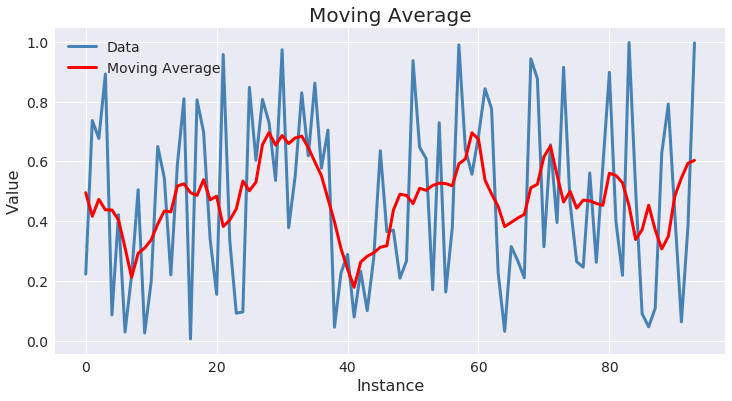

In [69]:
program =\
'''
load "io".
load "random".

seed(42).

-- Asteroid allows the user to escape to the Python 
-- ecosystem.  Here we use this to construct a
-- plot of the moving average
function plot with (dt,avg) do escape
"
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# import parameters from Asteroid into Python
dt_val = state.symbol_table.lookup_sym('dt')
avg_val = state.symbol_table.lookup_sym('avg')

# convert from Asteroid lists to Python lists
dt_plot = []
for (_,v) in dt_val[1]:
    dt_plot.append(v)

avg_plot = []
for (_,v) in avg_val[1]:
    avg_plot.append(v)

# construct a dataframe to plot
df = pd.DataFrame(data={'Data':dt_plot,'Average':avg_plot})

# colors for the line plot
colors = ['steelblue', 'red']

# line plot
df.plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Data', 'Moving Average'], fontsize=14)

# title and labels
plt.title('Moving Average', fontsize=20)
plt.xlabel('Instance', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.show()
"
end

-- compute the window on lst
function window with (lst:%list,i:%integer) %if i >= 3 and i <= lst @length()-4 do
    return lst @[i-3,i-2,i-1,i,i+1,i+2,i+3].
end

-- sum the values of lst
function sum with lst:%list do
    return lst @reduce(lambda with (x,y) do return x+y).
end

let dt = [1 to 100] @map(lambda with _ do return random()).
let mavg = [3 to 96] @map(lambda with i do return sum(window(dt,i))/7).

plot(dt @[3 to 96],mavg).
'''
interp(program)

### 58. Is an element in a list?

> Tell if the given value is in the list.

In [70]:
program =\
'''
load "io".

let array = [10, 14, 0, 15, 17, 20, 30, 35].
let x = 17.
println ((x+" is in the list") if array @member(x) else (x+" is not in the list")).
'''
interp(program)

17 is in the list


We can also use a reduction function to solve this,

In [71]:
program =\
'''
load "io".

let array = [10, 14, 0, 15, 17, 20, 30, 35].
let x = 17.

if array @reduce(lambda with (acc,i) do return true if i==x else acc,false) do
    println (x+" is in the list"). 
else 
    println (x+" is not in the list").
end
'''
interp(program)

17 is in the list


### 59. First odd number

> Find the first odd number in a list of integers.

The easiest way to do this is with a reduction.

In [72]:
program =\
'''
load "io".
load "math".

let array = [2, 4, 18, 9, 16, 7, 10].
let odd = array @reduce(lambda with (acc,i) do return i if isnone(acc) and mod(i,2) else acc,none). 
println odd.
'''
interp(program)

9


### 60. Take every second element

> Form a new array by picking every second element from the original array.



In [73]:
program =\
'''
load "io".
load "math".

let array = [20 to 30] @filter(lambda with x do return mod(x,2)).
println array.

assert (array == [21,23,25,27,29]).
'''
interp(program)

[21,23,25,27,29]


We can use an index vector to accomplish  the same thing,

In [74]:
program =\
'''
load "io".
load "math".

let a = [20 to 30].
let array = a @[1 to a @length()-1 step 2] .
println array.

assert (array == [21,23,25,27,29]).
'''
interp(program)

[21,23,25,27,29]


### 61. Number of occurrences in array

> Count how many times a particular element appears in the array.


In [75]:
program =\
'''
load "io".
load "math".

let dt = ["apple","pear","grape","lemon","peach","apple","banana","grape","pineapple","avocado"].
let cnt = dt @count("grape").
println cnt.

assert (cnt == 2).
'''
interp(program)

2


### 62. Finding unique elements

> Print all unique elements of the given array.

Converting a list to a set will remove all duplicate elements in the list.

In [76]:
program =\
'''
load "io".
load "set".

function unique with lst:%list do
    return toset lst @sort().
end

let a = unique([2, 3, 7, 4, 5, 5, 6, 2, 10, 7]).

println a.

assert (a == [2,3,4,5,6,7,10])
'''
interp(program)

[2,3,4,5,6,7,10]


### 63. Minimum and maximum

> Find the minimum and the maximum numbers in the given list of integers.



In [77]:
program =\
'''
load "io".

function max with lst:%list do
    return lst @sort(true) @0.
end

function min with lst:%list do
    return lst @sort() @0.
end

let a = max [7, 6, 12, 3, 4, 10, 2, 5, 15, 6, 7, 8, 9, 3].
let b = min [7, 6, 12, 3, 4, 10, 2, 5, 15, 6, 7, 8, 9, 3].


println a.
println b.

assert (a == 15 and b == 2).
'''
interp(program)

15
2


### 64. Increasing sequences

> Check if the given array contains increasing (or decreasing) numbers.



In [78]:
program =\
'''
load "io".
load "util".

let a = [3, 7, 19, 20, 34].
let b = toboolean(a @reduce(lambda with (x,y) do return y if x<y else false)).

println b.

assert (b).
'''
interp(program)

true
